In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv') 

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset Shape: (225745, 79)
Columns: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag C

In [2]:


# Handle Missing or Infinite Values
df = df.replace([float('inf'), float('-inf')], float('nan'))
df = df.dropna()
print("Dataset Shape after handling missing values:", df.shape)

# Drop Irrelevant Columns
irrelevant_columns = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']  # Add if present
df = df.drop(columns=[col for col in irrelevant_columns if col in df.columns], errors='ignore')

label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])



Dataset Shape after handling missing values: (225711, 79)


In [3]:
X = df.drop(columns=['Label'])
y = df['Label']

In [4]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_scaled, y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

preprocessed_df = pd.DataFrame(X_resampled, columns=[f'Feature_{i}' for i in range(X_selected.shape[1])])
preprocessed_df['Label'] = y_resampled
preprocessed_df.to_csv('preprocessed_cicids.csv', index=False)

# Output Shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Label Distribution in Training Set:", pd.Series(y_train).value_counts())


c:\Users\CS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\CS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Training Data Shape: (204840, 20)
Testing Data Shape: (51210, 20)
Label Distribution in Training Set: Label
1    102420
0    102420
Name: count, dtype: int64


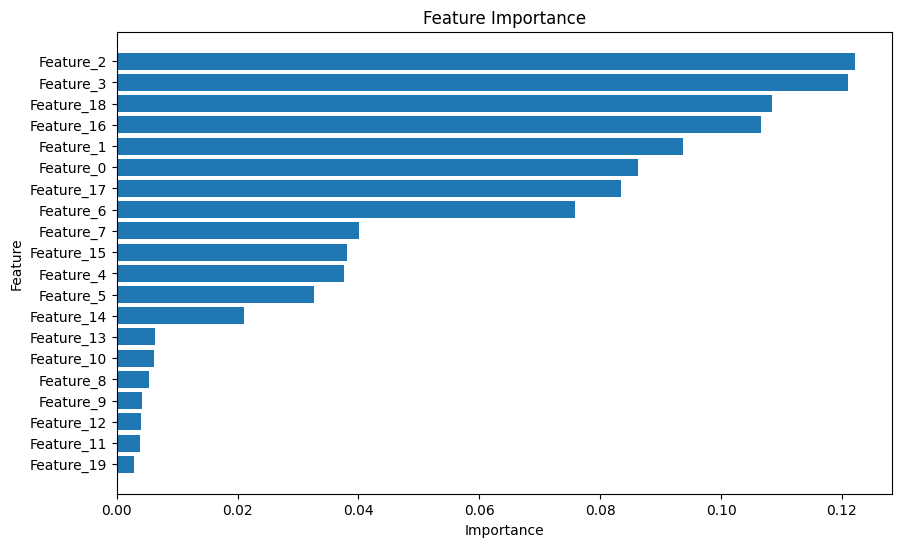

Random Forest Model Accuracy: 0.9995508689709042
[[25599     6]
 [   17 25588]]


In [5]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_names = [f'Feature_{i}' for i in range(X_selected.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()



# Evaluate the model using accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print (cm)


In [7]:
 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 10: Train Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 11: Evaluate SVM Model
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nSVM Model Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))




SVM Model Accuracy: 0.9823081429408319
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     25605
           1       0.97      1.00      0.98     25605

    accuracy                           0.98     51210
   macro avg       0.98      0.98      0.98     51210
weighted avg       0.98      0.98      0.98     51210



In [6]:



model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Model Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print (cm)



Decision Tree Model Accuracy: 0.9995508689709042
[[25599     6]
 [   17 25588]]
